<a href="https://colab.research.google.com/github/DoreenDoreen/StudentPerformancePredictionProject/blob/main/UTA_Take_Home_Challenge_LinMa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# UTA Student Performance Prediction Project

### Project Introduction

### Feature Information:

1. AdmitYear: Calendar year in which the student was admitted to UT Arlington. (numeric: 2013 - 2022)

2. SatTot02: SAT Total score (numeric: on the new 1600 point scale).

3. FirstTermGPA: Student's GPA (numeric: 4-point, unweighted) in their first semester at UTA.

4. Gender: Student's self-reported gender (binary: male or female).

5. TotalFamilyIncome: The total annual income of the student's family (in US dollars), numeric, as self-reported on the student's FAFSA application.

6. CapFlag: "Y" if the student was admitted as part of the Coordinated Admissions Program, otherwise "N". (Binary).  For details, see: https://admissions.utexas.edu/enroll/cap

7. ExtraCurricularActivities: "Y" if the student participated in extra-curricular activities during their first semester at UTA, otherwise "N". (Binary).

8. PellEligibility: "Y" if the student was eligible for a federal Pell Grant during their first semester at UTA, otherwise "N". (Binary).

9. HsGPA: High school GPA (numeric)

10. FirstTermEnrolledCollege: Starting College/School student majoring at UTA (nominal)

11. OneYearRetention: "1" if the student re-enrolled for the Fall semester one year after they were admitted to UTA, otherwise "0". (Binary).

* [Part 0: Load Packages and Load Data](#Part-0:-Load-Packages-and-Load-Data)
* [Part 1: Data Exploration](#Part-1:-Data-Exploration)
* [Part 2: Feature Engineering](#Part-2:-Feature-Engineering)
* [Part 3: Model Training](#Part-3:-Model-Training)
* [Part 4: Model Results Evaluation](#Part-3:-Model-Results-Evaluation)

# Part 0: Load Packages and Load Data

In [2]:
#import neccessary libraries
import numpy as np
import pandas as pd
import sklearn as sl
import sklearn.preprocessing as preprocessing
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.float_format', lambda x: '%.3f' % x)   # .float_format  means the precision of displaying numbers, that is 3 dicimal places
pd.set_option('display.max_columns',None)  # display.max_columns  means maximum displayed columns ， None means display all columns
pd.set_option('display.max_rows',None)

In [4]:
# import local file to Google colab
from google.colab import files

uploaded = files.upload()

Saving Synthetic Dataset-2023-Funda.xlsx to Synthetic Dataset-2023-Funda.xlsx


In [5]:
FundaDF = pd.read_excel('Synthetic Dataset-2023-Funda.xlsx', header=0) # header=0 means identifying the first row is the column title

FundaDF.head()

,AdmitYear,SatTot02,FirstTermGPA,Gender,TotalFamilyIncome,CapFlag,ExtraCurricularActivities,PellEligibility,HsGPA,FirstTermEnrolledCollege,OneYearRetention
0,2017,1200,3.104,Male,174963,N,Y,N,3.706,Col Nurse & Health Innovation,1
1,2020,1090,2.804,Female,52994,N,N,Y,3.618,Col Nurse & Health Innovation,1
2,2016,1090,3.424,Female,115717,N,Y,N,3.539,Col Nurse & Health Innovation,0
3,2021,900,2.801,Male,59681,N,N,Y,3.497,College of Science,0
4,2020,1150,3.733,Female,0,N,N,Y,3.571,Col Nurse & Health Innovation,1


In [6]:
RaoulDF = pd.read_excel('Synthetic Dataset-2023-Funda.xlsx', header=0) # header=0 means identifying the first row is the column title

RaoulDF.head()

,AdmitYear,SatTot02,FirstTermGPA,Gender,TotalFamilyIncome,CapFlag,ExtraCurricularActivities,PellEligibility,HsGPA,FirstTermEnrolledCollege,OneYearRetention
0,2017,1200,3.104,Male,174963,N,Y,N,3.706,Col Nurse & Health Innovation,1
1,2020,1090,2.804,Female,52994,N,N,Y,3.618,Col Nurse & Health Innovation,1
2,2016,1090,3.424,Female,115717,N,Y,N,3.539,Col Nurse & Health Innovation,0
3,2021,900,2.801,Male,59681,N,N,Y,3.497,College of Science,0
4,2020,1150,3.733,Female,0,N,N,Y,3.571,Col Nurse & Health Innovation,1


In [7]:
# prompt: check if FundaDF and RaoulDF exactly the same

are_same = FundaDF.equals(RaoulDF)
print(f"Are FundaDF and RaoulDF exactly the same? {are_same}")

Are FundaDF and RaoulDF exactly the same? True


In [8]:
DF = FundaDF.copy()
DF.head()   # Use DF as the dataframe for the follow-up analysis

,AdmitYear,SatTot02,FirstTermGPA,Gender,TotalFamilyIncome,CapFlag,ExtraCurricularActivities,PellEligibility,HsGPA,FirstTermEnrolledCollege,OneYearRetention
0,2017,1200,3.104,Male,174963,N,Y,N,3.706,Col Nurse & Health Innovation,1
1,2020,1090,2.804,Female,52994,N,N,Y,3.618,Col Nurse & Health Innovation,1
2,2016,1090,3.424,Female,115717,N,Y,N,3.539,Col Nurse & Health Innovation,0
3,2021,900,2.801,Male,59681,N,N,Y,3.497,College of Science,0
4,2020,1150,3.733,Female,0,N,N,Y,3.571,Col Nurse & Health Innovation,1


### Part 1: Data Exploration

#### 1.1 Preview Feature Information

In [9]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   AdmitYear                  30000 non-null  int64  
 1   SatTot02                   30000 non-null  int64  
 2   FirstTermGPA               30000 non-null  float64
 3   Gender                     30000 non-null  object 
 4   TotalFamilyIncome          30000 non-null  int64  
 5   CapFlag                    30000 non-null  object 
 6   ExtraCurricularActivities  30000 non-null  object 
 7   PellEligibility            30000 non-null  object 
 8   HsGPA                      30000 non-null  float64
 9   FirstTermEnrolledCollege   30000 non-null  object 
 10  OneYearRetention           30000 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 2.5+ MB


#### 1.2 Checking Missingness and Duplicates

In [10]:
# check duplicated records
if DF.duplicated().sum() == 0:
  print('no duplicated index')

no duplicated index


In [11]:
# checking missing data
missing = DF.isnull().sum()
print(missing)

AdmitYear                    0
SatTot02                     0
FirstTermGPA                 0
Gender                       0
TotalFamilyIncome            0
CapFlag                      0
ExtraCurricularActivities    0
PellEligibility              0
HsGPA                        0
FirstTermEnrolledCollege     0
OneYearRetention             0
dtype: int64


In [12]:
# Validate value of 0

print((DF == 0).sum(axis=0) / DF.shape[0] )  # .shape will return a tuple representing the dimensionality of the DataFrame;
                                           # df.shape[0] return total row,  df.shape[1] return total column


AdmitYear                   0.000
SatTot02                    0.000
FirstTermGPA                0.000
Gender                      0.000
TotalFamilyIncome           0.049
CapFlag                     0.000
ExtraCurricularActivities   0.000
PellEligibility             0.000
HsGPA                       0.000
FirstTermEnrolledCollege    0.000
OneYearRetention            0.143
dtype: float64




```
# Invalid value of 0 found!
```

After checking the definition of "OneYearRetention" variable, the value of 0 is meaningful, thus the value of 0 are not missing value. However, the variable of "TotalFamilyIncome" are not in this case. Therefor, missing data were detected on the variables "TotalFamilyIncome".





## 1.3 Understand Numerical Features

### 1.3.1 Calculating descriptive statistics

In [13]:
DF.describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.95])

,AdmitYear,SatTot02,FirstTermGPA,TotalFamilyIncome,HsGPA,OneYearRetention
count,30000.000,30000.000,30000.000,30000.000,30000.000,30000.000
mean,2017.722,1137.704,3.031,70309.706,3.399,0.857
std,1.438,116.797,0.473,64405.741,0.958,0.350
min,2013.000,750.000,0.893,-51612.000,1.556,0.000
10%,2016.000,980.000,2.384,13060.400,2.939,0.000
25%,2017.000,1060.000,2.735,27766.750,3.174,1.000
50%,2018.000,1140.000,3.082,53908.500,3.409,1.000
75%,2019.000,1220.000,3.382,98959.250,3.616,1.000
95%,2020.000,1330.000,3.720,178050.050,3.856,1.000
max,2022.000,1500.000,4.000,1734020.000,115.145,1.000


from matplotlib import pyplot as plt
_df_0['AdmitYear'].plot(kind='hist', bins=20, title='AdmitYear')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['SatTot02'].plot(kind='hist', bins=20, title='SatTot02')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['FirstTermGPA'].plot(kind='hist', bins=20, title='FirstTermGPA')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['TotalFamilyIncome'].plot(kind='hist', bins=20, title='TotalFamilyIncome')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='AdmitYear', y='SatTot02', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='SatTot02', y='FirstTermGPA', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='FirstTermGPA', y='TotalFamilyIncome', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='TotalFamilyIncome', y='HsGPA', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['AdmitYear'].plot(kind='line', figsize=(8, 4), title='AdmitYear')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['SatTot02'].plot(kind='line', figsize=(8, 4), title='SatTot02')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['FirstTermGPA'].plot(kind='line', figsize=(8, 4), title='FirstTermGPA')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['TotalFamilyIncome'].plot(kind='line', figsize=(8, 4), title='TotalFamilyIncome')
plt.gca().spines[['top', 'right']].set_visible(False)

##### Findings: After checking those above descriptive statistics among numerical features, several problems detected:
    1). The variable "TotalFamilyIncome" has problem in distribution, the minimum income is a negative value, that raise attention.
    2). The variable "HsGPA" has a maximum value of 115.145, which may be an outlier (raise attention)
    3). The distribution of other variables looks normal.    

### 1.3.2 Understanding features distributions


In [14]:
num_features_01 = DF.columns[DF.dtypes =='int64' ]
num_features_01

Index(['AdmitYear', 'SatTot02', 'TotalFamilyIncome', 'OneYearRetention'], dtype='object')

array([[<Axes: title={'center': 'AdmitYear'}>,
        <Axes: title={'center': 'SatTot02'}>],
       [<Axes: title={'center': 'TotalFamilyIncome'}>,
        <Axes: title={'center': 'OneYearRetention'}>]], dtype=object)

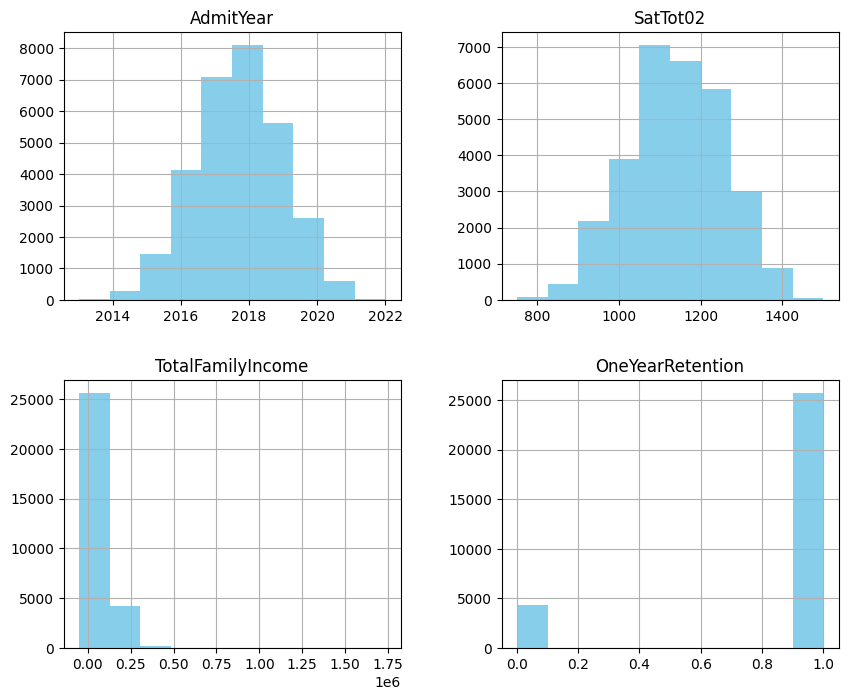

In [15]:
DF[num_features_01].hist(figsize=(10, 8), color='skyblue')



In [16]:
num_features_02 = DF.columns[DF.dtypes =='float64']
num_features_02

Index(['FirstTermGPA', 'HsGPA'], dtype='object')

array([[<Axes: title={'center': 'FirstTermGPA'}>,
        <Axes: title={'center': 'HsGPA'}>]], dtype=object)

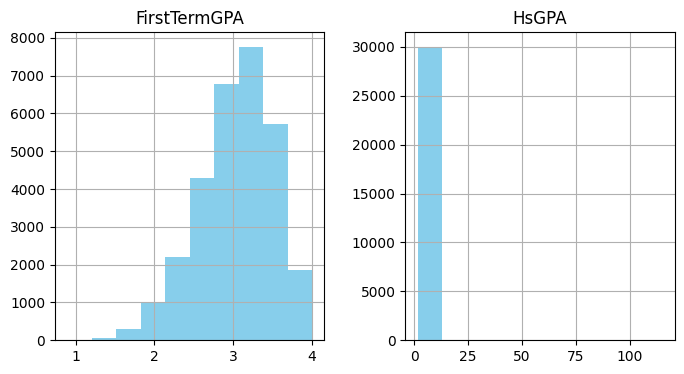

In [17]:
DF[num_features_02].hist(figsize=(8,4), color='skyblue')


### 1.2.3 Relationship between numerical features

In [18]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   AdmitYear                  30000 non-null  int64  
 1   SatTot02                   30000 non-null  int64  
 2   FirstTermGPA               30000 non-null  float64
 3   Gender                     30000 non-null  object 
 4   TotalFamilyIncome          30000 non-null  int64  
 5   CapFlag                    30000 non-null  object 
 6   ExtraCurricularActivities  30000 non-null  object 
 7   PellEligibility            30000 non-null  object 
 8   HsGPA                      30000 non-null  float64
 9   FirstTermEnrolledCollege   30000 non-null  object 
 10  OneYearRetention           30000 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 2.5+ MB


In [19]:
num_features = DF.columns[(DF.dtypes =='int64') | (DF.dtypes =='float64')]
num_features

Index(['AdmitYear', 'SatTot02', 'FirstTermGPA', 'TotalFamilyIncome', 'HsGPA',
       'OneYearRetention'],
      dtype='object')

In [168]:
cor_matrix = DF[num_features].corr()
cor_matrix

,AdmitYear,SatTot02,FirstTermGPA,TotalFamilyIncome,HsGPA,OneYearRetention
AdmitYear,1.000,-0.003,0.057,0.082,0.043,-0.018
SatTot02,-0.003,1.000,0.493,0.292,0.137,0.078
FirstTermGPA,0.057,0.493,1.000,0.209,0.158,0.112
TotalFamilyIncome,0.082,0.292,0.209,1.000,0.052,-0.001
HsGPA,0.043,0.137,0.158,0.052,1.000,0.025
OneYearRetention,-0.018,0.078,0.112,-0.001,0.025,1.000


<Axes: >

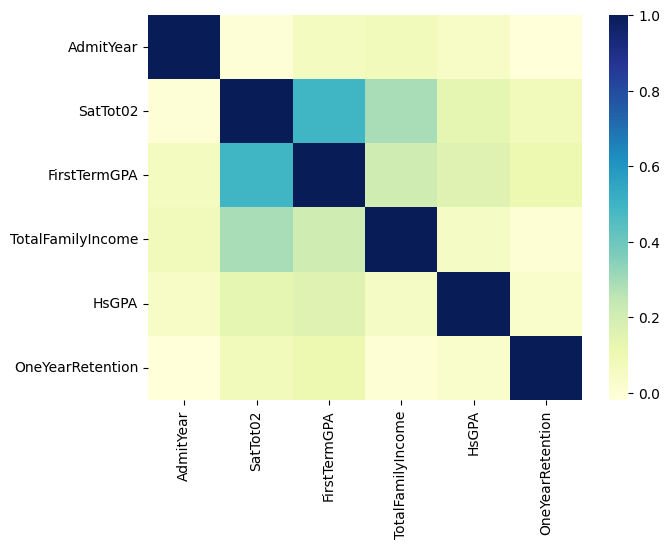

In [169]:
plt.figure(figsize=(7, 5))
sns.heatmap(cor_matrix, cmap='YlGnBu')

## 1.4 Understand Categorical Features


### 1.4.1 Distribution of standard categorical features

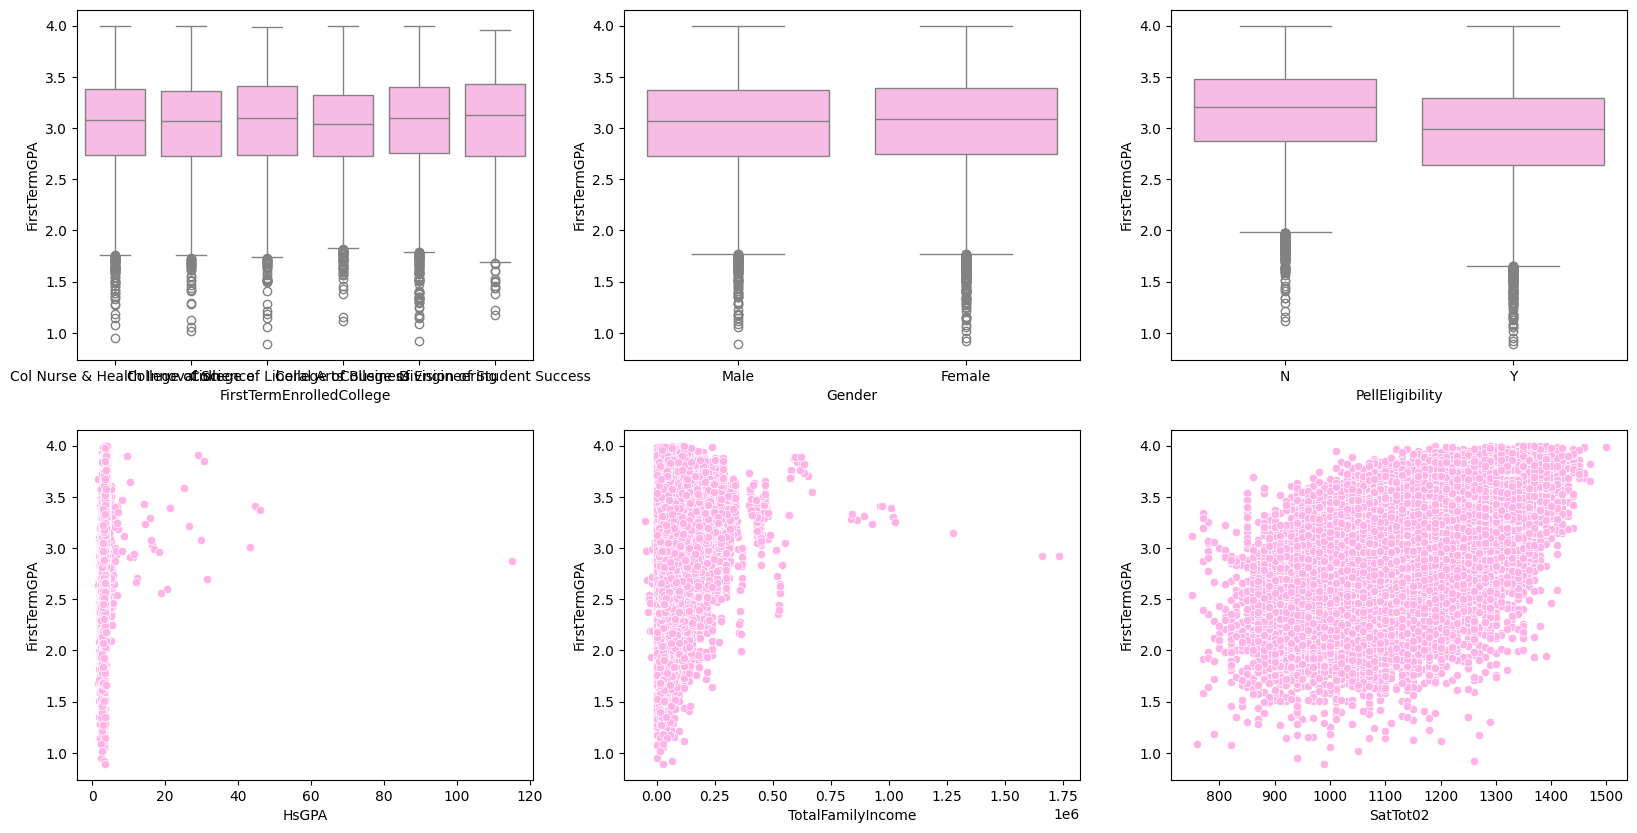

In [29]:
fig, axss = plt.subplots(2,3, figsize=[20,10])

my_colors = ['#ffb3e6', '#B7C3F3',
              '#ff9999','#98FB98','#ffcc99']


sns.set_palette( my_colors )

sns.boxplot(x='FirstTermEnrolledCollege', y='FirstTermGPA', data=DF, ax=axss[0][0])
sns.boxplot(x='Gender', y='FirstTermGPA', data=DF, ax=axss[0][1])
sns.boxplot(x='PellEligibility', y='FirstTermGPA', data=DF, ax=axss[0][2])

sns.scatterplot(x='HsGPA', y='FirstTermGPA', data=DF, ax=axss[1][0])
sns.scatterplot(x='TotalFamilyIncome', y='FirstTermGPA', data=DF, ax=axss[1][1])
sns.scatterplot(x='SatTot02', y='FirstTermGPA', data=DF, ax=axss[1][2])



plt.show()

### 1.4.2 Distribution of demorgraphic info

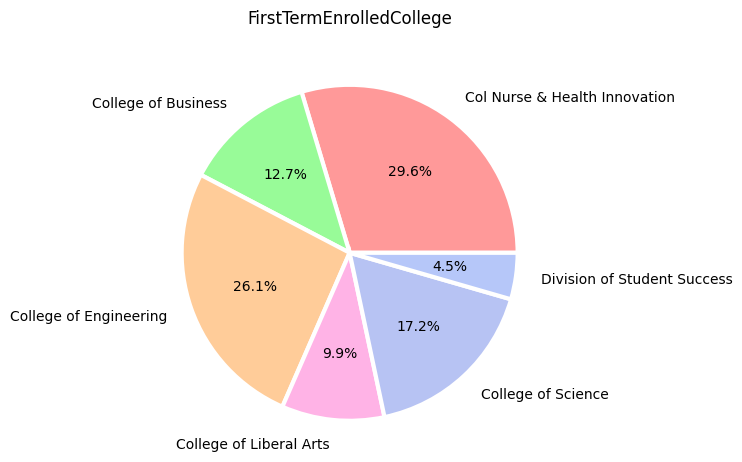

In [35]:
# create college data
names= 'Col Nurse & Health Innovation', 'College of Business', 'College of Engineering' , 'College of Liberal Arts', 'College of Science', 'Division of Student Success'
values=[len(DF[DF['FirstTermEnrolledCollege'].str.contains('Col Nurse & Health Innovation')]), len(DF[DF['FirstTermEnrolledCollege'].str.contains('College of Business')]), len(DF[DF['FirstTermEnrolledCollege'].str.contains('College of Engineering')]), len(DF[DF['FirstTermEnrolledCollege'].str.contains('College of Liberal Arts')]), len(DF[DF['FirstTermEnrolledCollege'].str.contains('College of Science')]),  len(DF[DF['FirstTermEnrolledCollege'].str.contains('Division of Student Success')]) ]
colors = ['#ff9999','#98FB98','#ffcc99','#ffb3e6', '#B7C3F3', '#B6C7F9']

# Label distance: gives the space between labels and the center of the pie
plt.pie(values, labels=names, labeldistance=1.15, wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' }, autopct='%1.1f%%', colors = colors);
plt.title('FirstTermEnrolledCollege', pad=32);
plt.axis('equal');
plt.show();

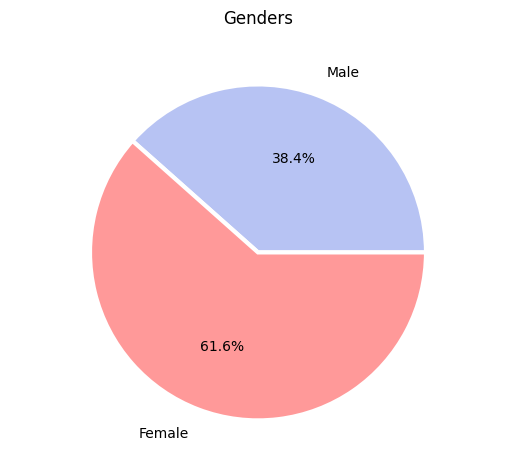

In [37]:
# create gender data
names='Male', 'Female' ,
values=[len(DF[DF['Gender'].str.contains('Male')]), len(DF[DF['Gender'].str.contains('Female')])]
colors = ['#B7C3F3', '#ff9999']

# Label distance: gives the space between labels and the center of the pie
plt.pie(values, labels=names, labeldistance=1.15, wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' }, autopct='%1.1f%%', colors = colors);
plt.title('Genders', pad=32);

plt.axis('equal');
plt.show();

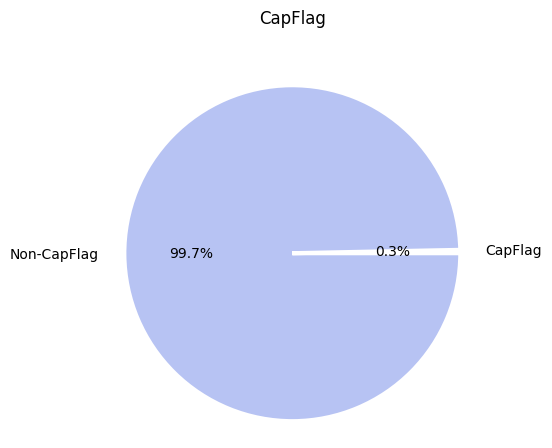

In [39]:
# create CapFlag data
names='CapFlag', 'Non-CapFlag',
values=[len(DF[DF['CapFlag'].str.contains('Y')]), len(DF[DF['CapFlag'].str.contains('N')])]
colors = ['#ff9999', '#B7C3F3']

# Label distance: gives the space between labels and the center of the pie
plt.pie(values, labels=names, labeldistance=1.15, wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' }, autopct='%1.1f%%', colors = colors);
plt.title('CapFlag', pad=32);

plt.axis('equal');
plt.show();

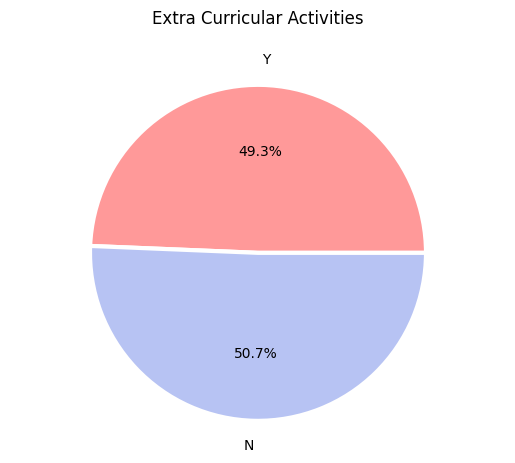

In [40]:
# create ExtraCurricularActivities data
names='Y', 'N',
values=[len(DF[DF['ExtraCurricularActivities'].str.contains('Y')]), len(DF[DF['ExtraCurricularActivities'].str.contains('N')])]
colors = ['#ff9999', '#B7C3F3']

# Label distance: gives the space between labels and the center of the pie
plt.pie(values, labels=names, labeldistance=1.15, wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' }, autopct='%1.1f%%', colors = colors);
plt.title('Extra Curricular Activities', pad=32);

plt.axis('equal');
plt.show();

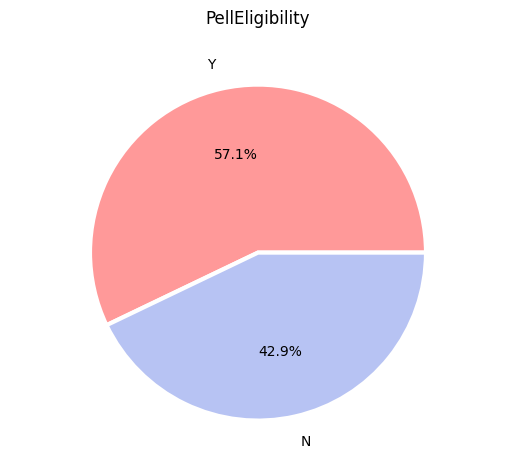

In [41]:
# create PellEligibility data
names='Y', 'N',
values=[len(DF[DF['PellEligibility'].str.contains('Y')]), len(DF[DF['PellEligibility'].str.contains('N')])]
colors = ['#ff9999', '#B7C3F3']

# Label distance: gives the space between labels and the center of the pie
plt.pie(values, labels=names, labeldistance=1.15, wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' }, autopct='%1.1f%%', colors = colors);
plt.title('PellEligibility', pad=32);

plt.axis('equal');
plt.show();

# Part 2: Feature Engineering

In [95]:
DF.head()

,AdmitYear,SatTot02,FirstTermGPA,Gender,TotalFamilyIncome,CapFlag,ExtraCurricularActivities,PellEligibility,HsGPA,FirstTermEnrolledCollege,OneYearRetention
0,2017,1200,3.104,Male,174963,N,Y,N,3.706,Col Nurse & Health Innovation,1
1,2020,1090,2.804,Female,52994,N,N,Y,3.618,Col Nurse & Health Innovation,1
2,2016,1090,3.424,Female,115717,N,Y,N,3.539,Col Nurse & Health Innovation,0
3,2021,900,2.801,Male,59681,N,N,Y,3.497,College of Science,0
4,2020,1150,3.733,Female,0,N,N,Y,3.571,Col Nurse & Health Innovation,1


In [107]:
# Remove OneYearRetention variable

X = DF.drop(['OneYearRetention'], axis=1)
X.head()

,AdmitYear,SatTot02,FirstTermGPA,Gender,TotalFamilyIncome,CapFlag,ExtraCurricularActivities,PellEligibility,HsGPA,FirstTermEnrolledCollege
0,2017,1200,3.104,Male,174963,N,Y,N,3.706,Col Nurse & Health Innovation
1,2020,1090,2.804,Female,52994,N,N,Y,3.618,Col Nurse & Health Innovation
2,2016,1090,3.424,Female,115717,N,Y,N,3.539,Col Nurse & Health Innovation
3,2021,900,2.801,Male,59681,N,N,Y,3.497,College of Science
4,2020,1150,3.733,Female,0,N,N,Y,3.571,Col Nurse & Health Innovation


## 2.1 Categorical Features

In [108]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   AdmitYear                  30000 non-null  int64  
 1   SatTot02                   30000 non-null  int64  
 2   FirstTermGPA               30000 non-null  float64
 3   Gender                     30000 non-null  object 
 4   TotalFamilyIncome          30000 non-null  int64  
 5   CapFlag                    30000 non-null  object 
 6   ExtraCurricularActivities  30000 non-null  object 
 7   PellEligibility            30000 non-null  object 
 8   HsGPA                      30000 non-null  float64
 9   FirstTermEnrolledCollege   30000 non-null  object 
dtypes: float64(2), int64(3), object(5)
memory usage: 2.3+ MB


### 2.1.1 One-hot Encoding to convert 4 binary features: Gender, CapFlag, ExtraCurricularActivities, PellEligibility.


In [81]:
from sklearn.preprocessing import OneHotEncoder

In [109]:
def OneHotEncoding(df, encode, category):
  cur_df = encode.transform(df[category])
  features = encode.get_feature_names_out(category)
  transformed = pd.DataFrame(cur_df.toarray(), columns = features)
  res = pd.concat([df.reset_index(drop=True), transformed], axis=1)
  return res.drop(category, axis=1)

In [110]:
# Convert categorical features with >=3 levels using One-Hot Encoding approach

cat = ['FirstTermEnrolledCollege']

for i in range(len(cat)):
  category = [cat[i]]
  # print('category => ', category)

  initial_ohe = OneHotEncoder()
  initial_ohe.fit(DF[category])

  X = OneHotEncoding(X, initial_ohe, category)

In [111]:
X.head(10)

,AdmitYear,SatTot02,FirstTermGPA,Gender,TotalFamilyIncome,CapFlag,ExtraCurricularActivities,PellEligibility,HsGPA,FirstTermEnrolledCollege_Col Nurse & Health Innovation,FirstTermEnrolledCollege_College of Business,FirstTermEnrolledCollege_College of Engineering,FirstTermEnrolledCollege_College of Liberal Arts,FirstTermEnrolledCollege_College of Science,FirstTermEnrolledCollege_Division of Student Success
0,2017,1200,3.104,Male,174963,N,Y,N,3.706,1.000,0.000,0.000,0.000,0.000,0.000
1,2020,1090,2.804,Female,52994,N,N,Y,3.618,1.000,0.000,0.000,0.000,0.000,0.000
2,2016,1090,3.424,Female,115717,N,Y,N,3.539,1.000,0.000,0.000,0.000,0.000,0.000
3,2021,900,2.801,Male,59681,N,N,Y,3.497,0.000,0.000,0.000,0.000,1.000,0.000
4,2020,1150,3.733,Female,0,N,N,Y,3.571,1.000,0.000,0.000,0.000,0.000,0.000
5,2017,1390,3.249,Male,123654,N,N,N,3.387,0.000,0.000,0.000,1.000,0.000,0.000
6,2018,1130,2.294,Female,76197,N,N,N,3.512,1.000,0.000,0.000,0.000,0.000,0.000
7,2017,1090,2.575,Female,47539,N,N,Y,3.483,0.000,0.000,0.000,1.000,0.000,0.000
8,2019,1030,3.447,Male,0,N,N,Y,3.578,0.000,1.000,0.000,0.000,0.000,0.000
9,2015,1220,3.653,Female,63002,N,N,Y,3.374,0.000,0.000,0.000,0.000,1.000,0.000


In [112]:
# Convert categorical features with 2 levels using Ordinal Encoding approach
from sklearn.preprocessing import OrdinalEncoder

In [113]:
cat_cols = X.columns[X.dtypes == 'object']
cat_cols

Index(['Gender', 'CapFlag', 'ExtraCurricularActivities', 'PellEligibility'], dtype='object')

In [114]:
bi_cat = []
s = set(cat)

for feature in cat_cols:
  if feature not in s:
    bi_cat.append(feature)

bi_cat

['Gender', 'CapFlag', 'ExtraCurricularActivities', 'PellEligibility']

In [115]:
# Covert features using Ordinal Encoding

for j in range(len(bi_cat)):
  name = [bi_cat[j]]

  initial_oe = OrdinalEncoder()
  initial_oe.fit(X[name])

  X[name] = initial_oe.transform(X[name])

In [116]:
X.head(10)

,AdmitYear,SatTot02,FirstTermGPA,Gender,TotalFamilyIncome,CapFlag,ExtraCurricularActivities,PellEligibility,HsGPA,FirstTermEnrolledCollege_Col Nurse & Health Innovation,FirstTermEnrolledCollege_College of Business,FirstTermEnrolledCollege_College of Engineering,FirstTermEnrolledCollege_College of Liberal Arts,FirstTermEnrolledCollege_College of Science,FirstTermEnrolledCollege_Division of Student Success
0,2017,1200,3.104,1.000,174963,0.000,1.000,0.000,3.706,1.000,0.000,0.000,0.000,0.000,0.000
1,2020,1090,2.804,0.000,52994,0.000,0.000,1.000,3.618,1.000,0.000,0.000,0.000,0.000,0.000
2,2016,1090,3.424,0.000,115717,0.000,1.000,0.000,3.539,1.000,0.000,0.000,0.000,0.000,0.000
3,2021,900,2.801,1.000,59681,0.000,0.000,1.000,3.497,0.000,0.000,0.000,0.000,1.000,0.000
4,2020,1150,3.733,0.000,0,0.000,0.000,1.000,3.571,1.000,0.000,0.000,0.000,0.000,0.000
5,2017,1390,3.249,1.000,123654,0.000,0.000,0.000,3.387,0.000,0.000,0.000,1.000,0.000,0.000
6,2018,1130,2.294,0.000,76197,0.000,0.000,0.000,3.512,1.000,0.000,0.000,0.000,0.000,0.000
7,2017,1090,2.575,0.000,47539,0.000,0.000,1.000,3.483,0.000,0.000,0.000,1.000,0.000,0.000
8,2019,1030,3.447,1.000,0,0.000,0.000,1.000,3.578,0.000,1.000,0.000,0.000,0.000,0.000
9,2015,1220,3.653,0.000,63002,0.000,0.000,1.000,3.374,0.000,0.000,0.000,0.000,1.000,0.000


## 2.2 Numerical Features

### 2.2.1 Missing data

In [117]:
IncomeDF = DF[['TotalFamilyIncome']]
IncomeDF.head()

,TotalFamilyIncome
0,174963
1,52994
2,115717
3,59681
4,0


In [118]:
# step 1: replace those missing data to nan
IncomeDF[['TotalFamilyIncome']] = IncomeDF[['TotalFamilyIncome']].replace(0, np.nan)
print(IncomeDF.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   TotalFamilyIncome  28525 non-null  float64
dtypes: float64(1)
memory usage: 234.5 KB
None


In [119]:
IncomeDF.head()

,TotalFamilyIncome
0,174963.000
1,52994.000
2,115717.000
3,59681.000
4,NaN


In [120]:
# Step 2: filing nan by mean value
newIncomeDF123=IncomeDF.copy()
newIncomeDF123['TotalFamilyIncome'] = newIncomeDF123['TotalFamilyIncome'].fillna(newIncomeDF123['TotalFamilyIncome'].mean())

print(newIncomeDF123.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   TotalFamilyIncome  30000 non-null  float64
dtypes: float64(1)
memory usage: 234.5 KB
None


In [121]:
newIncomeDF123.head()

,TotalFamilyIncome
0,174963.000
1,52994.000
2,115717.000
3,59681.000
4,73945.353


In [122]:
X['TotalFamilyIncome'] = newIncomeDF123['TotalFamilyIncome']
X.head()

,AdmitYear,SatTot02,FirstTermGPA,Gender,TotalFamilyIncome,CapFlag,ExtraCurricularActivities,PellEligibility,HsGPA,FirstTermEnrolledCollege_Col Nurse & Health Innovation,FirstTermEnrolledCollege_College of Business,FirstTermEnrolledCollege_College of Engineering,FirstTermEnrolledCollege_College of Liberal Arts,FirstTermEnrolledCollege_College of Science,FirstTermEnrolledCollege_Division of Student Success
0,2017,1200,3.104,1.000,174963.000,0.000,1.000,0.000,3.706,1.000,0.000,0.000,0.000,0.000,0.000
1,2020,1090,2.804,0.000,52994.000,0.000,0.000,1.000,3.618,1.000,0.000,0.000,0.000,0.000,0.000
2,2016,1090,3.424,0.000,115717.000,0.000,1.000,0.000,3.539,1.000,0.000,0.000,0.000,0.000,0.000
3,2021,900,2.801,1.000,59681.000,0.000,0.000,1.000,3.497,0.000,0.000,0.000,0.000,1.000,0.000
4,2020,1150,3.733,0.000,73945.353,0.000,0.000,1.000,3.571,1.000,0.000,0.000,0.000,0.000,0.000


In [132]:
newIncomeDF123['OneYearRetention'] = DF['OneYearRetention']
newIncomeDF123.head()

,TotalFamilyIncome,OneYearRetention
0,174963.000,1
1,52994.000,1
2,115717.000,0
3,59681.000,0
4,73945.353,1


In [133]:
X['OneYearRetention'] = newIncomeDF123['OneYearRetention']
X.head()

,AdmitYear,SatTot02,FirstTermGPA,Gender,TotalFamilyIncome,CapFlag,ExtraCurricularActivities,PellEligibility,HsGPA,FirstTermEnrolledCollege_Col Nurse & Health Innovation,FirstTermEnrolledCollege_College of Business,FirstTermEnrolledCollege_College of Engineering,FirstTermEnrolledCollege_College of Liberal Arts,FirstTermEnrolledCollege_College of Science,FirstTermEnrolledCollege_Division of Student Success,OneYearRetention
0,2017,1200,3.104,1.000,174963.000,0.000,1.000,0.000,3.706,1.000,0.000,0.000,0.000,0.000,0.000,1
1,2020,1090,2.804,0.000,52994.000,0.000,0.000,1.000,3.618,1.000,0.000,0.000,0.000,0.000,0.000,1
2,2016,1090,3.424,0.000,115717.000,0.000,1.000,0.000,3.539,1.000,0.000,0.000,0.000,0.000,0.000,0
3,2021,900,2.801,1.000,59681.000,0.000,0.000,1.000,3.497,0.000,0.000,0.000,0.000,1.000,0.000,0
4,2020,1150,3.733,0.000,73945.353,0.000,0.000,1.000,3.571,1.000,0.000,0.000,0.000,0.000,0.000,1


### Part 2.2.2 Feature scaling

The impact of different scaling methods on the model performance is small. This project used the standard scaling (sc) data .

2 types of scaling feature approaches：

*   Type 1: Standardization: calculating mean and sdandard deviation，then normalize or standardize numerical feature
*   Type 2: min-max: Forcibly pull the variable between 0 and 1 or -1 and 1 through the maximum value and the minimum value

In [134]:
X.columns

Index(['AdmitYear', 'SatTot02', 'FirstTermGPA', 'Gender', 'TotalFamilyIncome',
       'CapFlag', 'ExtraCurricularActivities', 'PellEligibility', 'HsGPA',
       'FirstTermEnrolledCollege_Col Nurse & Health Innovation',
       'FirstTermEnrolledCollege_College of Business',
       'FirstTermEnrolledCollege_College of Engineering',
       'FirstTermEnrolledCollege_College of Liberal Arts',
       'FirstTermEnrolledCollege_College of Science',
       'FirstTermEnrolledCollege_Division of Student Success',
       'OneYearRetention'],
      dtype='object')

In [136]:
# Standard scaling or standardization

scale_lst = ['SatTot02', 'FirstTermGPA', 'Gender', 'TotalFamilyIncome', 'HsGPA']
new_X = X.copy()

In [138]:
init_scale = preprocessing.StandardScaler()
sc_scale = init_scale.fit(new_X[scale_lst])

new_X[scale_lst] = sc_scale.transform(new_X[scale_lst])
new_X.head()

,AdmitYear,SatTot02,FirstTermGPA,Gender,TotalFamilyIncome,CapFlag,ExtraCurricularActivities,PellEligibility,HsGPA,FirstTermEnrolledCollege_Col Nurse & Health Innovation,FirstTermEnrolledCollege_College of Business,FirstTermEnrolledCollege_College of Engineering,FirstTermEnrolledCollege_College of Liberal Arts,FirstTermEnrolledCollege_College of Science,FirstTermEnrolledCollege_Division of Student Success,OneYearRetention
0,2017,0.533,0.154,1.266,1.619,0.000,1.000,0.000,0.320,1.000,0.000,0.000,0.000,0.000,0.000,1
1,2020,-0.408,-0.481,-0.790,-0.336,0.000,0.000,1.000,0.229,1.000,0.000,0.000,0.000,0.000,0.000,1
2,2016,-0.408,0.830,-0.790,0.670,0.000,1.000,0.000,0.146,1.000,0.000,0.000,0.000,0.000,0.000,0
3,2021,-2.035,-0.487,1.266,-0.229,0.000,0.000,1.000,0.102,0.000,0.000,0.000,0.000,1.000,0.000,0
4,2020,0.105,1.484,-0.790,-0.000,0.000,0.000,1.000,0.180,1.000,0.000,0.000,0.000,0.000,0.000,1


# Part 3: Model Training

## 3.1 Split datasets

In [139]:
new_X.columns

Index(['AdmitYear', 'SatTot02', 'FirstTermGPA', 'Gender', 'TotalFamilyIncome',
       'CapFlag', 'ExtraCurricularActivities', 'PellEligibility', 'HsGPA',
       'FirstTermEnrolledCollege_Col Nurse & Health Innovation',
       'FirstTermEnrolledCollege_College of Business',
       'FirstTermEnrolledCollege_College of Engineering',
       'FirstTermEnrolledCollege_College of Liberal Arts',
       'FirstTermEnrolledCollege_College of Science',
       'FirstTermEnrolledCollege_Division of Student Success',
       'OneYearRetention'],
      dtype='object')

In [140]:
# split into 2 datasets, one for model training (75%), another for model testing(15%)
train, test = train_test_split(new_X, test_size=0.25, random_state = 3)

In [141]:
train.info()  # 22500 entries, total 15 columns

<class 'pandas.core.frame.DataFrame'>
Index: 22500 entries, 6235 to 5994
Data columns (total 16 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   AdmitYear                                               22500 non-null  int64  
 1   SatTot02                                                22500 non-null  float64
 2   FirstTermGPA                                            22500 non-null  float64
 3   Gender                                                  22500 non-null  float64
 4   TotalFamilyIncome                                       22500 non-null  float64
 5   CapFlag                                                 22500 non-null  float64
 6   ExtraCurricularActivities                               22500 non-null  float64
 7   PellEligibility                                         22500 non-null  float64
 8   HsGPA                                  

In [142]:
test.info()  # 7500 entries, total 15 columns

<class 'pandas.core.frame.DataFrame'>
Index: 7500 entries, 18210 to 24937
Data columns (total 16 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   AdmitYear                                               7500 non-null   int64  
 1   SatTot02                                                7500 non-null   float64
 2   FirstTermGPA                                            7500 non-null   float64
 3   Gender                                                  7500 non-null   float64
 4   TotalFamilyIncome                                       7500 non-null   float64
 5   CapFlag                                                 7500 non-null   float64
 6   ExtraCurricularActivities                               7500 non-null   float64
 7   PellEligibility                                         7500 non-null   float64
 8   HsGPA                                 

In [146]:
model_train_x = train.drop(['OneYearRetention'], axis = 1)  # delete the label 'OneYearRetention' in training dataset
model_train_y = train['OneYearRetention'] # select label from the training dataset

model_test_x = test.drop(['OneYearRetention'], axis = 1)
model_test_y = test['OneYearRetention']

### 3.2 Logistic regression (L1)

In [147]:
from sklearn.linear_model import LogisticRegression

# Train a Logistic Regression model
logreg_model = LogisticRegression()
logreg_model.fit(model_train_x, model_train_y)

LogisticRegression()

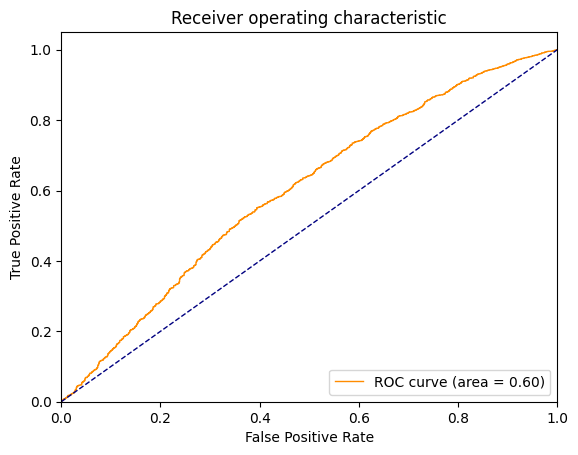

In [148]:
# Draw graph

import matplotlib.pyplot as plt
# Calculate ROC curve
from sklearn.metrics import roc_curve, auc

y_pred_prob = logreg_model.predict_proba(model_test_x)[:, 1]
fpr, tpr, thresholds = roc_curve(model_test_y, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

Model retrained successfully on combined data.
ROC AUC on original test set with retrained model: 0.60


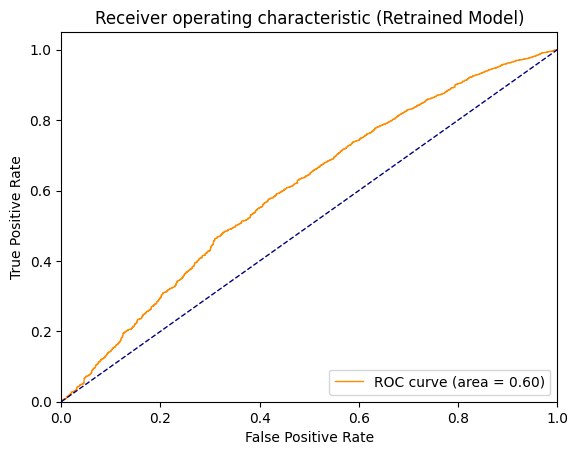

In [150]:
## combine the validate data and training data, re-train the model

import pandas as pd
import matplotlib.pyplot as plt
# Concatenate training and testing data
combined_data = pd.concat([train, test], ignore_index=True)

# Separate features (X_combined) and target variable (y_combined)
X_combined = combined_data.drop(['OneYearRetention'], axis=1)
y_combined = combined_data['OneYearRetention']

# Re-train the Logistic Regression model on the combined data
logreg_model_retrained = LogisticRegression()
logreg_model_retrained.fit(X_combined, y_combined)

print("Model retrained successfully on combined data.")

# Note: You can now evaluate the performance of the retrained model if needed
# For example, if you had a separate validation set you didn't use before.
# If you want to see performance on the original test set using the retrained model:
y_pred_prob_retrained = logreg_model_retrained.predict_proba(model_test_x)[:, 1]
fpr_retrained, tpr_retrained, thresholds_retrained = roc_curve(model_test_y, y_pred_prob_retrained)
roc_auc_retrained = auc(fpr_retrained, tpr_retrained)

print(f"ROC AUC on original test set with retrained model: {roc_auc_retrained:.2f}")

# Plot ROC curve for the retrained model on the original test set
plt.figure()
plt.plot(fpr_retrained, tpr_retrained, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc_retrained)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (Retrained Model)')
plt.legend(loc="lower right")
plt.show()

## 3.3   Logistic regression (L2)

In [151]:
import pandas as pd
import matplotlib.pyplot as plt

# Train a Logistic Regression model with L2 regularization
logreg_model_l2 = LogisticRegression(penalty='l2', solver='liblinear') # 'liblinear' solver is good for small datasets and supports L1/L2

logreg_model_l2.fit(model_train_x, model_train_y)

# Calculate ROC curve
y_pred_prob_l2 = logreg_model_l2.predict_proba(model_test_x)[:, 1]
fpr_l2, tpr_l2, thresholds_l2 = roc_curve(model_test_y, y_pred_prob_l2)
roc_auc_l2 = auc(fpr_l2, tpr_l2)

print(f"L2 ROC AUC: {roc_auc_l2:.2f}")

L2 ROC AUC: 0.60


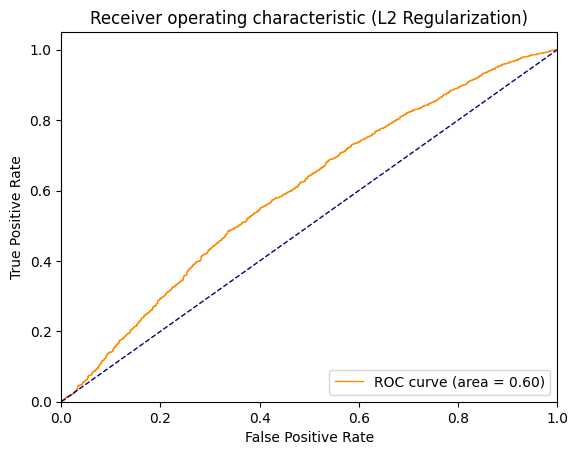

L2 Model retrained successfully on combined data.


In [152]:
# Plot ROC curve
plt.figure()
plt.plot(fpr_l2, tpr_l2, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc_l2)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (L2 Regularization)')
plt.legend(loc="lower right")
plt.show()

# Concatenate training and testing data
combined_data = pd.concat([train, test], ignore_index=True)

# Separate features (X_combined) and target variable (y_combined)
X_combined = combined_data.drop(['OneYearRetention'], axis=1)
y_combined = combined_data['OneYearRetention']

# Re-train the Logistic Regression model with L2 regularization on the combined data
logreg_model_l2_retrained = LogisticRegression(penalty='l2', solver='liblinear')
logreg_model_l2_retrained.fit(X_combined, y_combined)

print("L2 Model retrained successfully on combined data.")

L2 ROC AUC on original test set with retrained model: 0.59


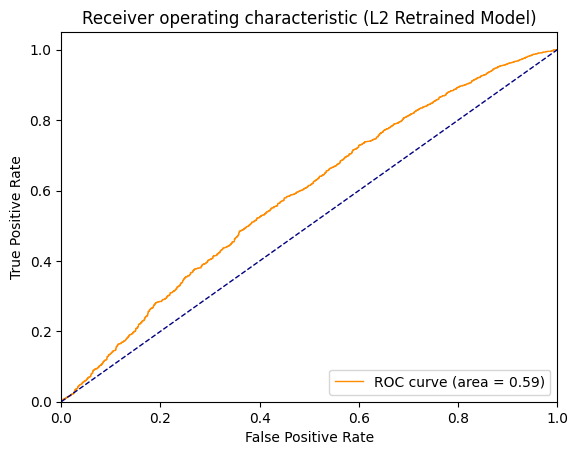

In [153]:

# Note: You can now evaluate the performance of the retrained model if needed
# For example, if you had a separate validation set you didn't use before.
# If you want to see performance on the original test set using the retrained model:
y_pred_prob_l2_retrained = logreg_model_l2_retrained.predict_proba(model_test_x)[:, 1]
fpr_l2_retrained, tpr_l2_retrained, thresholds_l2_retrained = roc_curve(model_test_y, y_pred_prob_l2_retrained)
roc_auc_l2_retrained = auc(fpr_l2_retrained, tpr_l2_retrained)

print(f"L2 ROC AUC on original test set with retrained model: {roc_auc_l2_retrained:.2f}")

# Plot ROC curve for the retrained model on the original test set
plt.figure()
plt.plot(fpr_l2_retrained, tpr_l2_retrained, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc_l2_retrained)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (L2 Retrained Model)')
plt.legend(loc="lower right")
plt.show()


## 3.4 Random Forest

Random Forest ROC AUC: 0.57


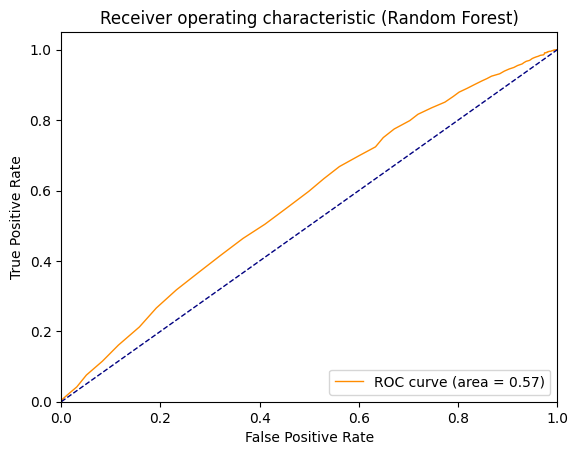

Random Forest Model retrained successfully on combined data.


In [154]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=3) # You can adjust n_estimators and other hyperparameters
rf_model.fit(model_train_x, model_train_y)

# Calculate ROC curve
y_pred_prob_rf = rf_model.predict_proba(model_test_x)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(model_test_y, y_pred_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

print(f"Random Forest ROC AUC: {roc_auc_rf:.2f}")

# Plot ROC curve
plt.figure()
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (Random Forest)')
plt.legend(loc="lower right")
plt.show()

# Concatenate training and testing data
combined_data = pd.concat([train, test], ignore_index=True)

# Separate features (X_combined) and target variable (y_combined)
X_combined = combined_data.drop(['OneYearRetention'], axis=1)
y_combined = combined_data['OneYearRetention']

# Re-train the Random Forest model on the combined data
rf_model_retrained = RandomForestClassifier(n_estimators=100, random_state=3)
rf_model_retrained.fit(X_combined, y_combined)

print("Random Forest Model retrained successfully on combined data.")

Random Forest ROC AUC on original test set with retrained model: 1.00


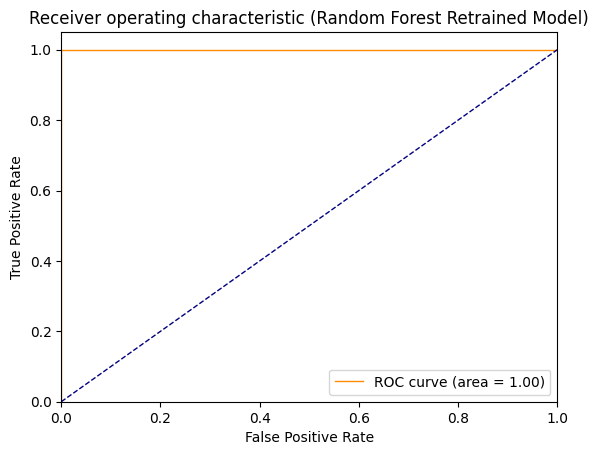

In [155]:
# Note: You can now evaluate the performance of the retrained model if needed   ??????????????????????????????
# For example, if you had a separate validation set you didn't use before.
# If you want to see performance on the original test set using the retrained model:
y_pred_prob_rf_retrained = rf_model_retrained.predict_proba(model_test_x)[:, 1]
fpr_rf_retrained, tpr_rf_retrained, thresholds_rf_retrained = roc_curve(model_test_y, y_pred_prob_rf_retrained)
roc_auc_rf_retrained = auc(fpr_rf_retrained, tpr_rf_retrained)

print(f"Random Forest ROC AUC on original test set with retrained model: {roc_auc_rf_retrained:.2f}")

# Plot ROC curve for the retrained model on the original test set
plt.figure()
plt.plot(fpr_rf_retrained, tpr_rf_retrained, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc_rf_retrained)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (Random Forest Retrained Model)')
plt.legend(loc="lower right")
plt.show()


# Part 4: Model Results Evaluation

## 4.1: Evaluate all models

In [156]:
# create 4 new datasets

train_x = model_train_x
train_y = model_train_y

test_x = model_test_x
test_y = model_test_y

In [157]:
# Evaluate all models

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Function to evaluate a model
def evaluate_model(model, X_test, y_test, model_name):
  y_pred = model.predict(X_test)
  y_pred_prob = model.predict_proba(X_test)[:, 1]

  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)
  roc_auc = roc_auc_score(y_test, y_pred_prob)

  print(f"--- {model_name} Evaluation ---")
  print(f"Accuracy: {accuracy:.4f}")
  print(f"Precision: {precision:.4f}")
  print(f"Recall: {recall:.4f}")
  print(f"F1-Score: {f1:.4f}")
  print(f"ROC AUC: {roc_auc:.4f}")
  print("-" * (len(model_name) + 21))

# Evaluate each model on the test set
evaluate_model(logreg_model, test_x, test_y, "Logistic Regression (L1)")
evaluate_model(logreg_model_l2, test_x, test_y, "Logistic Regression (L2)")
evaluate_model(rf_model, test_x, test_y, "Random Forest")

# Evaluate the retrained models on the test set (using original test set for consistency)
evaluate_model(logreg_model_retrained, test_x, test_y, "Logistic Regression (L1) Retrained")
evaluate_model(logreg_model_l2_retrained, test_x, test_y, "Logistic Regression (L2) Retrained")
evaluate_model(rf_model_retrained, test_x, test_y, "Random Forest Retrained")

--- Logistic Regression (L1) Evaluation ---
Accuracy: 0.8548
Precision: 0.8554
Recall: 0.9991
F1-Score: 0.9217
ROC AUC: 0.5993
---------------------------------------------
--- Logistic Regression (L2) Evaluation ---
Accuracy: 0.8552
Precision: 0.8552
Recall: 1.0000
F1-Score: 0.9219
ROC AUC: 0.5963
---------------------------------------------
--- Random Forest Evaluation ---
Accuracy: 0.8497
Precision: 0.8571
Recall: 0.9892
F1-Score: 0.9184
ROC AUC: 0.5729
----------------------------------
--- Logistic Regression (L1) Retrained Evaluation ---
Accuracy: 0.8551
Precision: 0.8555
Recall: 0.9994
F1-Score: 0.9218
ROC AUC: 0.6018
-------------------------------------------------------
--- Logistic Regression (L2) Retrained Evaluation ---
Accuracy: 0.8555
Precision: 0.8554
Recall: 1.0000
F1-Score: 0.9221
ROC AUC: 0.5856
-------------------------------------------------------
--- Random Forest Retrained Evaluation ---
Accuracy: 0.9999
Precision: 0.9998
Recall: 1.0000
F1-Score: 0.9999
ROC AUC

## 4.2: Model Comparison

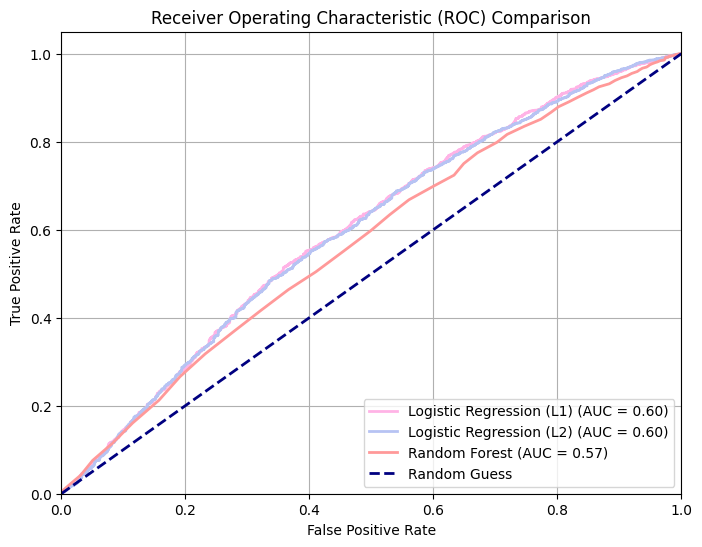

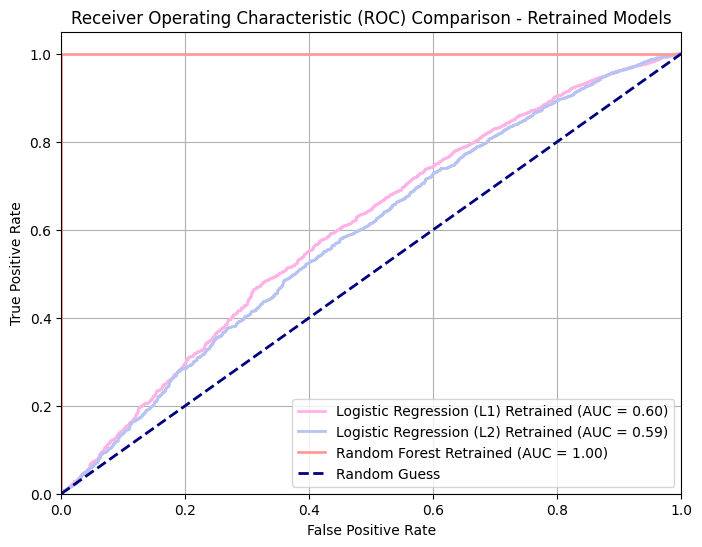

In [170]:
# Model Comparison

import matplotlib.pyplot as plt
# Plot ROC curves for all models on the same graph for comparison
plt.figure(figsize=(8, 6))

# Plot ROC for Logistic Regression (L1)
y_pred_prob_logreg = logreg_model.predict_proba(test_x)[:, 1]
fpr_logreg, tpr_logreg, _ = roc_curve(test_y, y_pred_prob_logreg)
roc_auc_logreg = auc(fpr_logreg, tpr_logreg)
plt.plot(fpr_logreg, tpr_logreg, lw=2, label=f'Logistic Regression (L1) (AUC = {roc_auc_logreg:.2f})')

# Plot ROC for Logistic Regression (L2)
y_pred_prob_logreg_l2 = logreg_model_l2.predict_proba(test_x)[:, 1]
fpr_logreg_l2, tpr_logreg_l2, _ = roc_curve(test_y, y_pred_prob_logreg_l2)
roc_auc_logreg_l2 = auc(fpr_logreg_l2, tpr_logreg_l2)
plt.plot(fpr_logreg_l2, tpr_logreg_l2, lw=2, label=f'Logistic Regression (L2) (AUC = {roc_auc_l2:.2f})') # Using the auc_l2 calculated previously

# Plot ROC for Random Forest
y_pred_prob_rf = rf_model.predict_proba(test_x)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(test_y, y_pred_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf) # Using the auc_rf calculated previously
plt.plot(fpr_rf, tpr_rf, lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')

# Plot the diagonal line
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Comparison')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


# Plot ROC curves for retrained models
plt.figure(figsize=(8, 6))

# Plot ROC for Logistic Regression (L1) Retrained
y_pred_prob_logreg_retrained = logreg_model_retrained.predict_proba(test_x)[:, 1]
fpr_logreg_retrained, tpr_logreg_retrained, _ = roc_curve(test_y, y_pred_prob_logreg_retrained)
roc_auc_logreg_retrained = auc(fpr_logreg_retrained, tpr_logreg_retrained) # Using the auc_retrained calculated previously
plt.plot(fpr_logreg_retrained, tpr_logreg_retrained, lw=2, label=f'Logistic Regression (L1) Retrained (AUC = {roc_auc_retrained:.2f})')

# Plot ROC for Logistic Regression (L2) Retrained
y_pred_prob_logreg_l2_retrained = logreg_model_l2_retrained.predict_proba(test_x)[:, 1]
fpr_logreg_l2_retrained, tpr_logreg_l2_retrained, _ = roc_curve(test_y, y_pred_prob_logreg_l2_retrained)
roc_auc_logreg_l2_retrained = auc(fpr_logreg_l2_retrained, tpr_logreg_l2_retrained) # Using the auc_l2_retrained calculated previously
plt.plot(fpr_logreg_l2_retrained, tpr_logreg_l2_retrained, lw=2, label=f'Logistic Regression (L2) Retrained (AUC = {roc_auc_l2_retrained:.2f})')

# Plot ROC for Random Forest Retrained
y_pred_prob_rf_retrained = rf_model_retrained.predict_proba(test_x)[:, 1]
fpr_rf_retrained, tpr_rf_retrained, _ = roc_curve(test_y, y_pred_prob_rf_retrained)
roc_auc_rf_retrained = auc(fpr_rf_retrained, tpr_rf_retrained) # Using the auc_rf_retrained calculated previously
plt.plot(fpr_rf_retrained, tpr_rf_retrained, lw=2, label=f'Random Forest Retrained (AUC = {roc_auc_rf_retrained:.2f})')

# Plot the diagonal line
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Comparison - Retrained Models')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


Finding:
  The above graph shows that Logistic Regression model (L1 and L2) and Random Forest model perform closely same because of the similar AUC scores.
  

## 4.3 Feature Importance

In [163]:
importances = rf_model_retrained.feature_importances_
feature_name = train_x.columns.values
indices = np.argsort(importances)[::-1]
# np.argsort(importances) will returns sorted indices as ndarray type that would sort an array in a descending order

<Figure size 640x480 with 0 Axes>

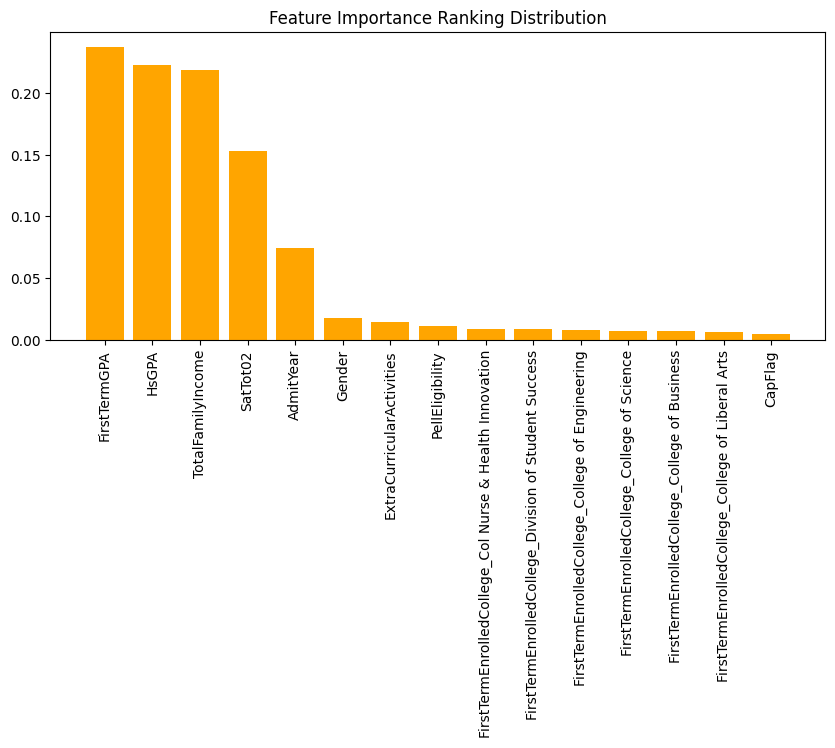

In [165]:
plt.figure(1)
plt.figure(figsize = [10,4])
plt.bar(feature_name[indices[:]], importances[indices[:]], color='orange')
plt.title('Feature Importance Ranking Distribution')
plt.xticks(rotation=90)  # control the rotation direction of label as 90 degree
plt.show()

Feature Importances (Random Forest Retrained Model):
                                              feature  importance
2                                        FirstTermGPA       0.237
8                                               HsGPA       0.223
4                                   TotalFamilyIncome       0.218
1                                            SatTot02       0.153
0                                           AdmitYear       0.074
3                                              Gender       0.018
6                           ExtraCurricularActivities       0.014
7                                     PellEligibility       0.011
9   FirstTermEnrolledCollege_Col Nurse & Health In...       0.009
14  FirstTermEnrolledCollege_Division of Student S...       0.009
11    FirstTermEnrolledCollege_College of Engineering       0.008
13        FirstTermEnrolledCollege_College of Science       0.007
10       FirstTermEnrolledCollege_College of Business       0.007
12   FirstTermEnrolledC

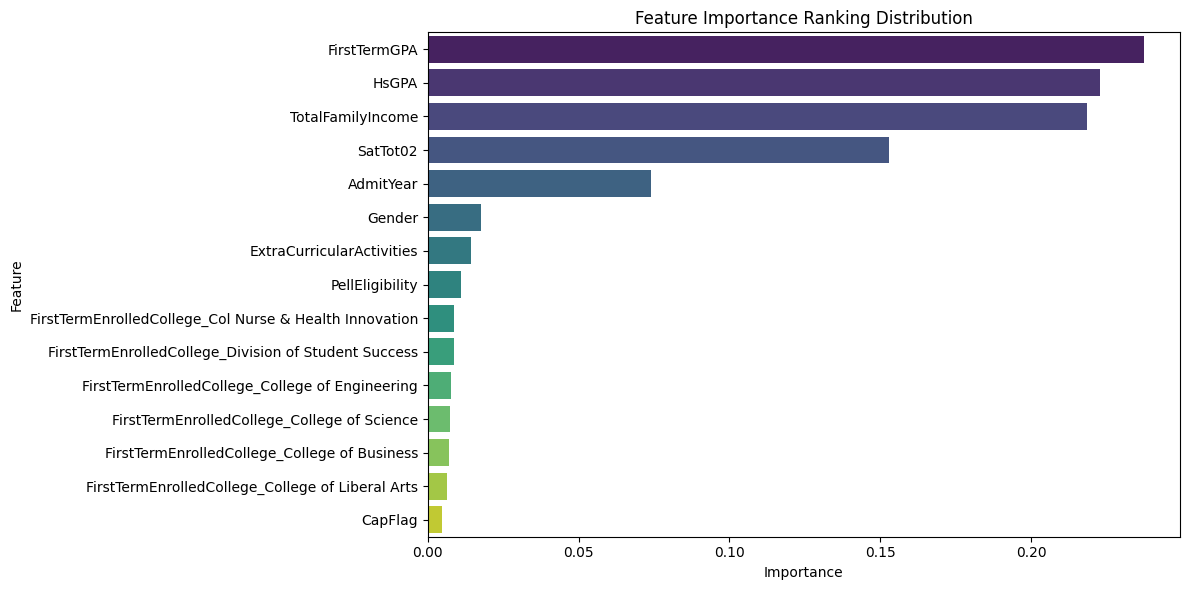

In [167]:
# prompt: run feature importance using random forest model

import pandas as pd
import matplotlib.pyplot as plt
# Get feature importances from the trained Random Forest model
importances = rf_model_retrained.feature_importances_

# Get the names of the features
feature_names = X_combined.columns

# Create a DataFrame to store feature importances
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

# Print or visualize the feature importances
print("Feature Importances (Random Forest Retrained Model):")
print(feature_importance_df)

# Optional: Plot the feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x='importance', y='feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance Ranking Distribution')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

#### Findings:
What factors contribute the most to students graduating in a timely manner include?

*   FirstTermGPA
*   HsGPA
*   TotalFamilyIncome
*   SatTot02
*   admitYear



Which variables indicate a potential problem for students?

*   Students’ financial status
*   first semester GPA
*   High School GPA
*   SAT total score


Which are indicators of student success?  

*   Strong academic outcomes and persistence
*   First-year experience programs
*   Early declaration of a major and stable academic path
*   Early declaration of a major and stable academic path
*   On-campus involvement (extracurricular activities)
*   High cumulative GPA
*   Early career goal identification (internships, research projects, career plan, etc.)  

